# Object
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--**to predict their clients' repayment abilities.**

# Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

Submission File
For each SK_ID_CURR in the test set, **the probability will be predicted for the TARGET variable**. The file should contain a header and have the following format:

SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.

# Data

1. application_{train|test}.csv
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.
<br> 
<br>
2. bureau.csv
    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
<br> 
<br>
3. bureau_balance.csv
    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
<br> 
<br>
4. POS_CASH_balance.csv
    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
<br> 
<br>
5. credit_card_balance.csv
    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
<br> 
<br>
6. previous_application.csv
    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.
<br> 
<br>
7. installments_payments.csv
    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
<br> 
<br>
8. HomeCredit_columns_description.csv
    - This file contains descriptions for the columns in the various data files.


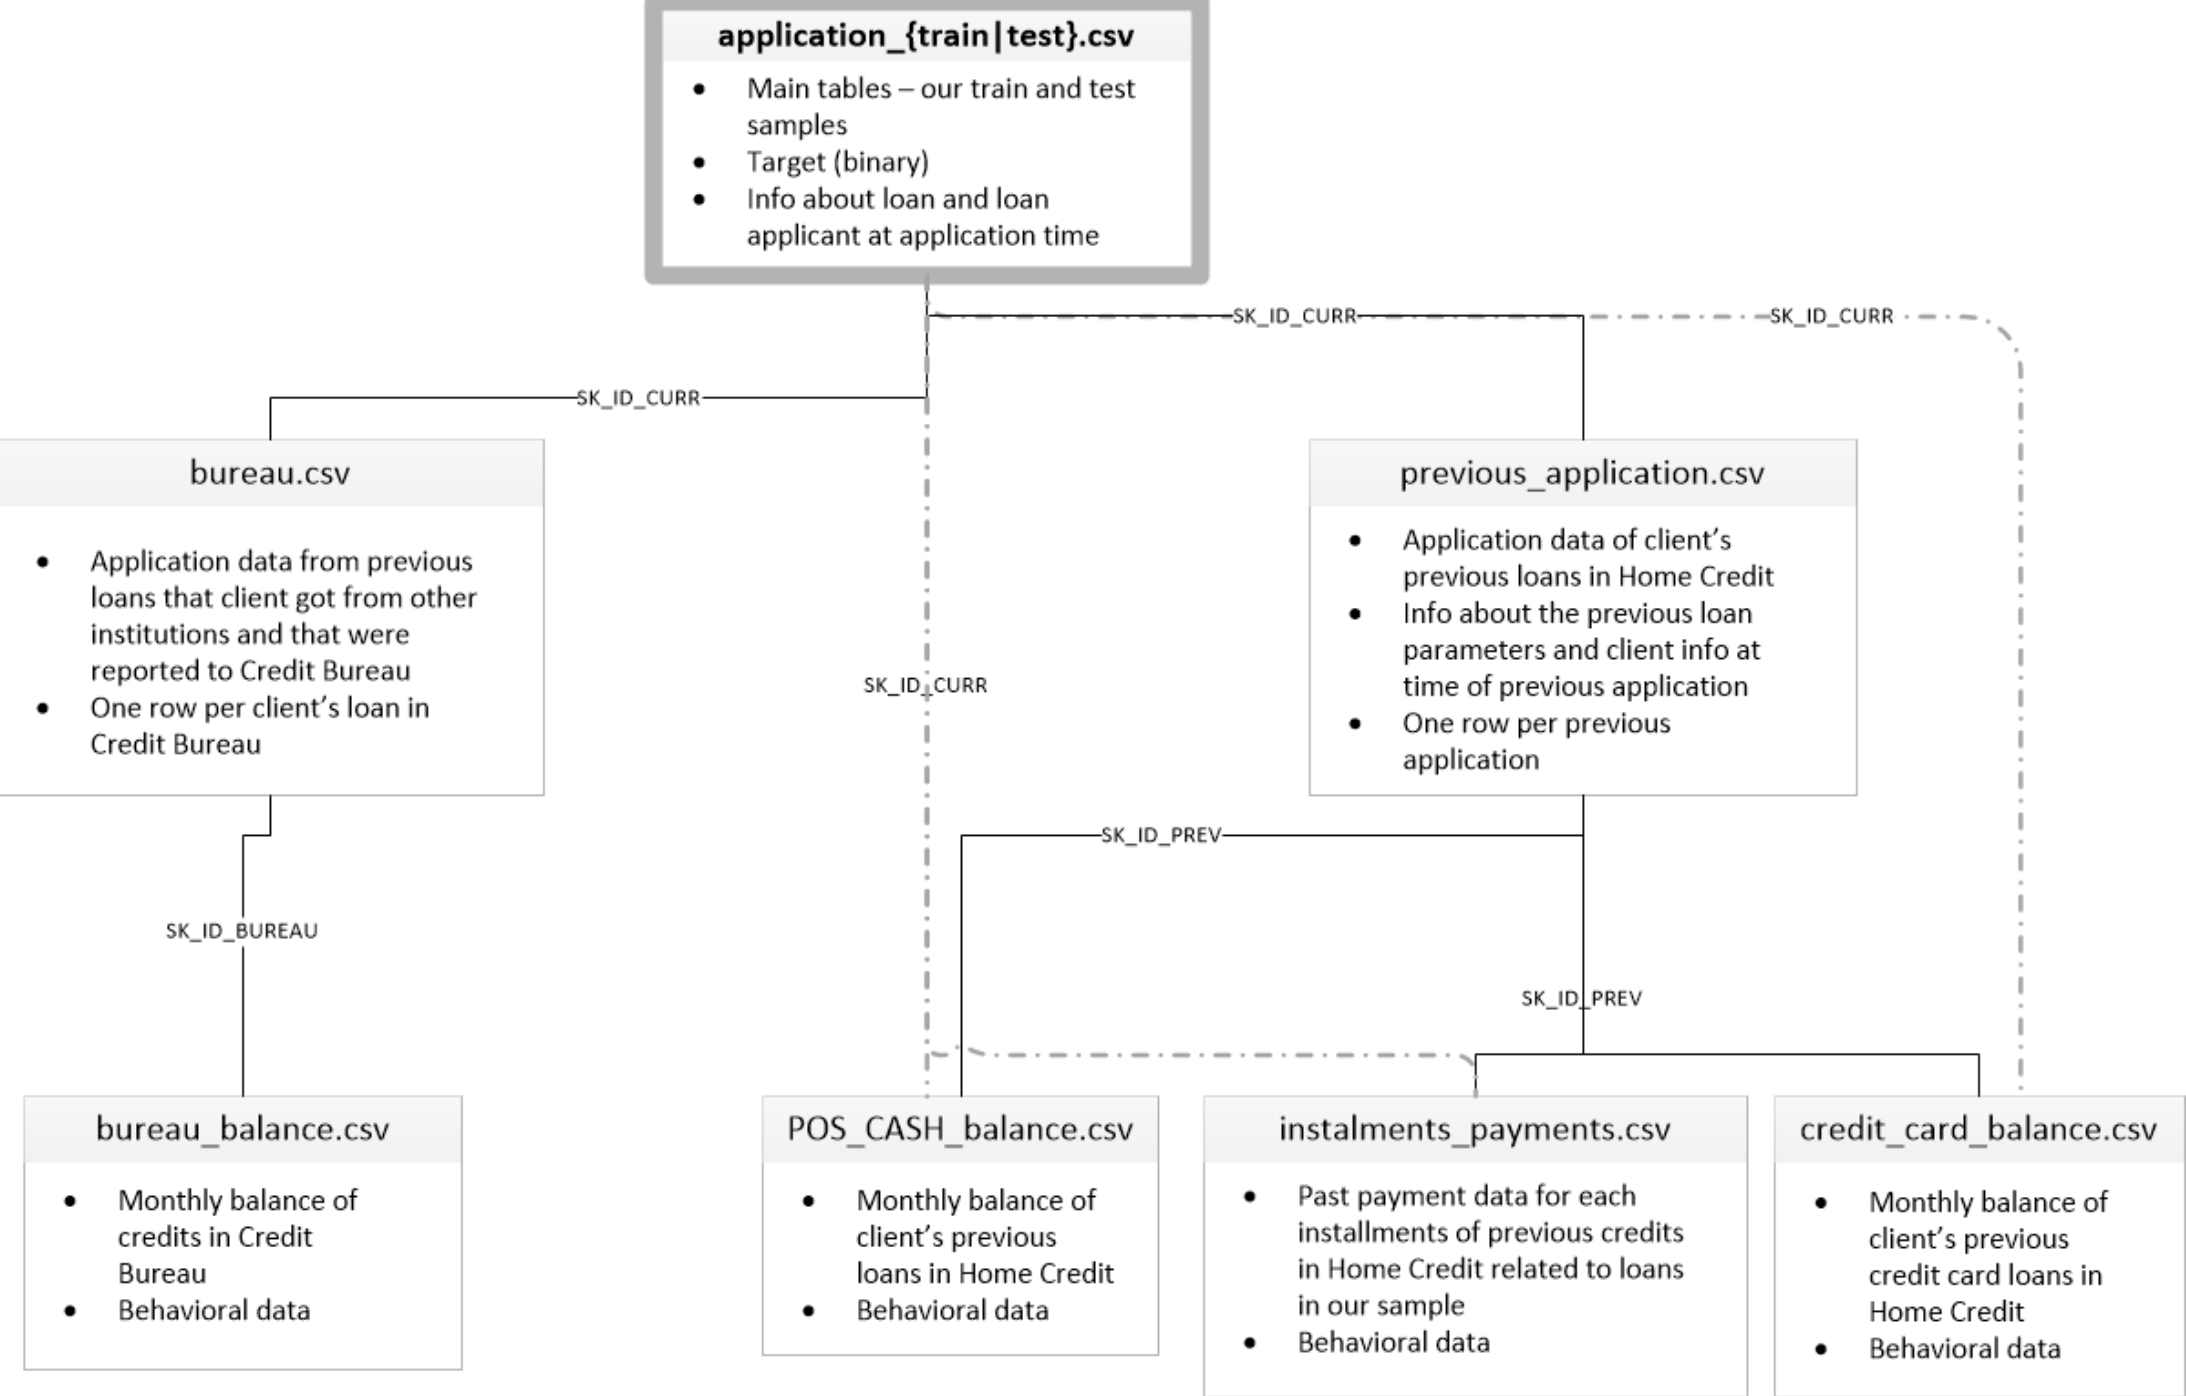

** Read application_{train|test}.csv to explore the data** 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import  Image
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import lightgbm as lgb
# fix by following installation file 
# and this https://github.com/Microsoft/LightGBM/issues/1369


In [2]:
# Explore what data are given
# to use os.listdir() method
# This method returns a list containing the names of the entries 
# in the directory given by path.
import os

# Open a file
path ='../home-credit'
dirs = os.listdir( path )

# # This would print all the files and directories
# for file in dirs:
#     print(file)

In [3]:
# read a file in python 
# pd.read_csv('file name')
import pandas as pd
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
credit_balance = pd.read_csv("credit_card_balance.csv")
previous_app = pd.read_csv("previous_application.csv")
ins_pay = pd.read_csv("installments_payments.csv")
# columns_des = pd.read_csv("HomeCredit_columns_description.csv")

In [4]:
application_train.to_csv('df.csv')

In [5]:
df = pd.read_csv('df.csv')

In [6]:
plt.style.use('dark_background')

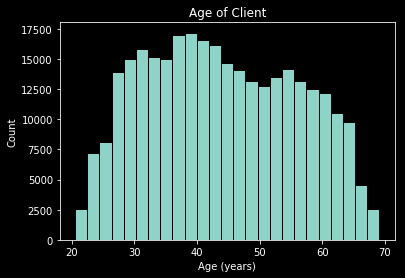

In [7]:
# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365*(-1), edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

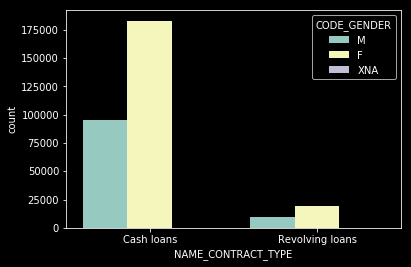

In [8]:
sns.countplot("NAME_CONTRACT_TYPE",hue='CODE_GENDER',
              data=application_train)

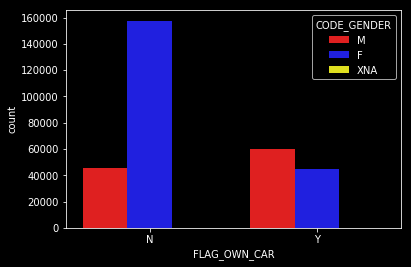

In [9]:
sns.countplot('FLAG_OWN_CAR',hue='CODE_GENDER',
              data=application_train,palette=["red","blue",'yellow'])

In [10]:
plt.style.use('classic')

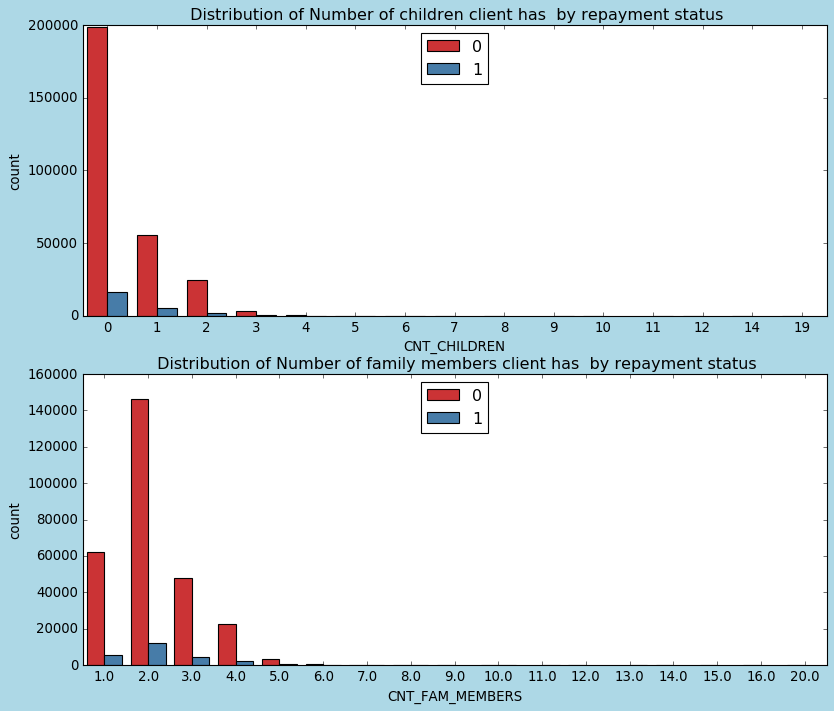

In [11]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_train["CNT_CHILDREN"],palette="Set1",hue=application_train["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_train["CNT_FAM_MEMBERS"],palette="Set1",hue=application_train["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

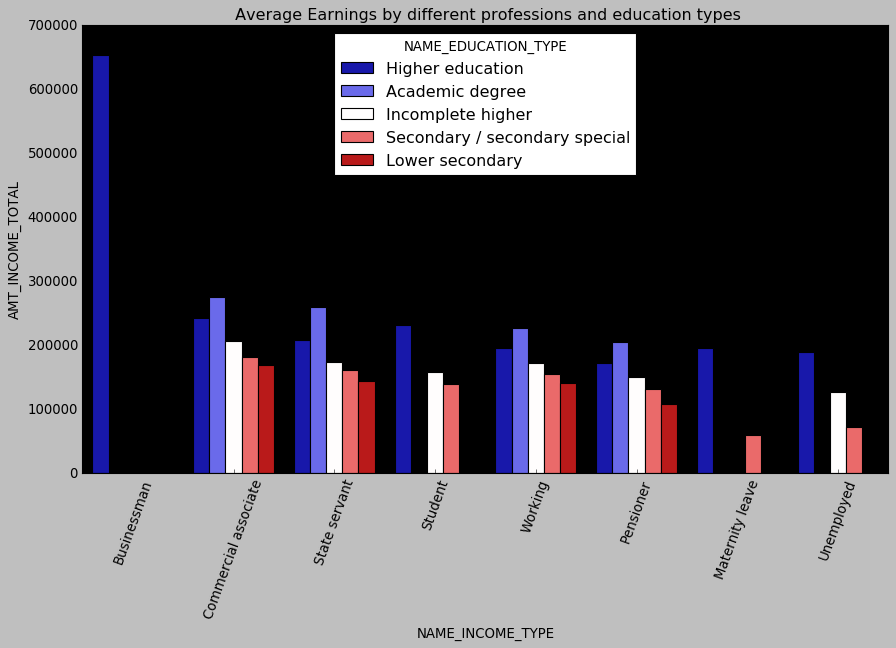

In [12]:
edu = application_train.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.xticks(rotation = 70)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

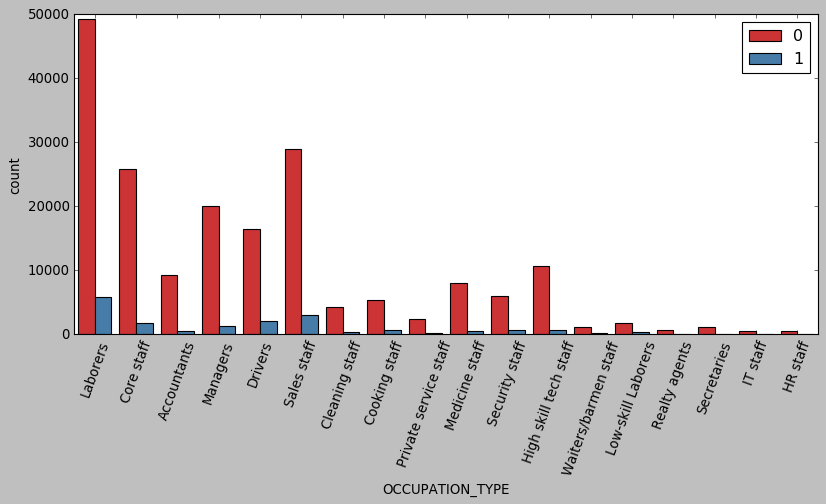

In [13]:
fig = plt.figure(figsize=(12,5))
sns.countplot(application_train["OCCUPATION_TYPE"],palette="Set1",hue=application_train["TARGET"])
plt.legend(loc="upper right")
plt.xticks(rotation = 70)

In [22]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [23]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

In [24]:
df = pd.read_csv('df.csv')

In [26]:
new_df=df[['NAME_EDUCATION_TYPE','OCCUPATION_TYPE','AMT_INCOME_TOTAL']]
new_df.columns=['cyl','mfr','income']
new_df.cyl = new_df.cyl.astype(str)
new_df.mfr = new_df.mfr.astype(str)
group = new_df.groupby(by=['cyl', 'mfr'])

source = ColumnDataSource(group)

#plot
p = figure(plot_width=1200, plot_height=600, title="Mean Annual Income by Education and Occupation",x_range=group)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Occupation by Education Level"
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = "Annual Income"
p.xaxis.axis_label_text_font_size = "10pt"

index_cmap = factor_cmap('cyl_mfr', palette=['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1'], 
                         factors=sorted(new_df.cyl.unique()), end=1)
p.vbar(x='cyl_mfr',top='income_mean',width=0.9, source=source,line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)
p.add_tools(HoverTool(tooltips=[("Income", "@income_mean"), ("Edu, Occup", "@cyl_mfr")]))
# output_file('edu_occup_income.html',mode='relative')
show(p)

### 2.1 Merging

#### 2.1.1 Concat and label the training and testing data

In [27]:
# defined as type, can perform the same function
application_train["type"]="train"
application_test['type']="test"

# concat train and test dataset for preprocessing
application = pd.concat([application_train,application_test],axis=0)

#### 2.1.2 Merge bureau and bureau_balance on SK_ID_BUREAU

In [28]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [29]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [30]:
# merge bureau and bureau_balance
b_bb = pd.merge(left= bureau,right=bureau_balance.reset_index(), how='left', on='SK_ID_BUREAU')

#### 2.1.3 Merge with application on SK_ID_CURR

In [32]:
# borrowed idea from kaggle
# https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772
b_bb_avg = b_bb.groupby('SK_ID_CURR').mean()
# label the source
b_bb_avg.columns = ['b_' + col for col in b_bb_avg.columns] 
# When we reset the index, the old index is added as a column, and a new sequential index is used:
data_b = pd.merge(left= application,right=b_bb_avg.reset_index(), how='left', on='SK_ID_CURR')

In [33]:
data_b.shape # left  (356255, 136)
# need use left

(356255, 138)

#### 2.1.4 merge with previous previous_app

In [34]:
# merge tables on data sequence
# previous_app.head()
# previous app has the same column "SK_ID_CURR" as the app train
# therefore, we can merge the two tables on SK_ID_CURR
# groupby() returns groupby object
mean_previous_app = previous_app.groupby('SK_ID_CURR').mean()

mean_previous_app.columns = ['p_'+ col for col in mean_previous_app.columns]

data_p = pd.merge(data_b,mean_previous_app.reset_index(),how="left",on = "SK_ID_CURR")

In [35]:
print(data_p.shape)

(356255, 158)


#### 2.1.5 merge with previous installment data ins_pay

In [36]:
# merge with previous installment data ins_pay
mean_ins_pay = ins_pay.groupby('SK_ID_CURR').mean()

mean_ins_pay.columns = ['i_'+ col for col in mean_ins_pay.columns]

data_i = pd.merge(data_p,mean_ins_pay.reset_index(),how="left",on = "SK_ID_CURR")

In [37]:
print(data_i.shape)

(356255, 165)


#### 2.1.6 merge with pos_cash_balance

In [38]:
# merge with previous installment data ins_pay
mean_pos_cash_balance = pos_cash_balance.groupby('SK_ID_CURR').mean()

mean_pos_cash_balance.columns = ['pc_'+ col for col in mean_pos_cash_balance.columns]

data_pc = pd.merge(data_i,mean_pos_cash_balance.reset_index(),how='left',on="SK_ID_CURR")

In [39]:
print(data_pc.shape)

(356255, 171)


#### 2.1.7 merge with credit_balance

In [40]:
# merge with credit_balance data
mean_credit_balance = credit_balance.groupby('SK_ID_CURR').mean()

mean_credit_balance.columns = ['c_'+ col for col in mean_credit_balance.columns]

data_c = pd.merge(data_pc,mean_credit_balance.reset_index(),how='left',on="SK_ID_CURR")

In [41]:
print(data_c.shape)

(356255, 192)


### 2.2 Handling Missing Data

Since some features have very high percentage of missing data, it is better to take out these extreme features to reduce complexity. For features have moderate missing values, filling with mean value is a common practice. 

Therefore, two steps are applied to handle the missing data.
    - Step 1: take out any features have more than 40% missing;
    - Step 2: fill missing value with mean from the available values.

In [42]:
# now we have all features dataset data_c
data_all = data_c
# percentage of missing value
per_data_all = pd.DataFrame(data_all.isnull().sum() / len(data_all) * 100)
# name the column
per_data_all.columns = ['percent']
# statistic summary
per_data_all.percent.describe()

count    192.000000
mean      27.604535
std       30.277512
min        0.000000
25%        0.000000
50%       11.939482
75%       58.268375
max       98.394128
Name: percent, dtype: float64

In [43]:
# # # drop all features that have missing value more than 40% by first create a dataframe 
# # # per_data_all to find a list of features we need for algorithm
upper_limit = 40.0
# per_data_all only contains features have less than 40% missing value
per_data_all = per_data_all[per_data_all.percent < upper_limit]
# show the dataframe
display(per_data_all.head())
# summary
per_data_all.percent.describe()

# get an index list
list_all = list(per_data_all.index)
# split the list into numerical and categorical for data process
# SK_ID_CURR need to be taken out, because it has to be 100002 int format 
# TARGET also needs to be left along because it is the label for training/testing
list_num = [x for x in list_all if data_all[x].dtypes != 'O' and x not in ['SK_ID_CURR','TARGET']]
print(len(list_num)) # 101 numerical features after taking out missing >40% features

list_cat = [x for x in list_all if data_all[x].dtypes == 'O']
# print(list_cat)
print(len(list_cat)) # 13 numerical features after taking out missing >40% features

# new list contain num and cat, no >40% missing features, no SK_ID_CURR, no TARGET
list_new = list_num + list_cat

# SK_ID_CURR is not in list_new
# SK_ID_CURR is in data_all
print('SK_ID_CURR' in data_all.columns)
#
# create a new data set contain num and cat, no >40% missing features, no SK_ID_CURR, no TARGET
data_new  = data_all[[i for i in data_all.columns if i in list_new]]

# check
print('SK_ID_CURR' in data_new.columns)

,percent
AMT_ANNUITY,0.010105
AMT_CREDIT,0.000000
AMT_GOODS_PRICE,0.078034
AMT_INCOME_TOTAL,0.000000
AMT_REQ_CREDIT_BUREAU_DAY,13.352234


101
13
True
False


In [44]:
# good_num_data filled NaN, no SK_ID_CURR, no TARGET, contains numerical and cat features
# define mean as NaN in data_new
good_num_data = data_new
for i in list_num:
    good_num_data[i].fillna(data_new[i].mean(),inplace=True) # must have inplace = True to active
# check the good numerical app train data with filled mean values on NaN
good_num_data.select_dtypes(exclude=['O']).isnull().sum().sum()

0

### 2.3 Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

In [45]:
# keep the old dataframe by defining a new one used in the future
# skip log transform
log_minmax_num_data = good_num_data
# import module
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
# only normalize on numerical list
scaler_list = list_num

# fit_transform() fit to data, then transform it
log_minmax_num_data[scaler_list] = scaler.fit_transform(good_num_data[scaler_list])
# show an example of a record with scaling applied
display(log_minmax_num_data.head(5))
# see statistic data
log_minmax_num_data.describe()
# data_all contains the merged SK_ID_CURR 
# data_all['SK_ID_CURR']

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,i_DAYS_INSTALMENT,i_DAYS_ENTRY_PAYMENT,i_AMT_INSTALMENT,i_AMT_PAYMENT,pc_SK_ID_PREV,pc_MONTHS_BALANCE,pc_CNT_INSTALMENT,pc_CNT_INSTALMENT_FUTURE,pc_SK_DPD,pc_SK_DPD_DEF
0,0.090032,0.090287,0.077441,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.899966,0.898168,0.004615,0.004615,0.021056,0.905263,0.323944,0.250000,0.0,0.0
1,0.132924,0.311736,0.271605,0.002089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.528893,0.549439,0.025854,0.025854,0.703917,0.549624,0.128270,0.096429,0.0,0.0
2,0.020025,0.022472,0.023569,0.000358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.742720,0.752716,0.002833,0.002833,0.305948,0.742105,0.038732,0.037500,0.0,0.0
3,0.109477,0.066837,0.063973,0.000935,0.000698,0.001452,0.008581,0.001166,0.003749,0.076463,...,0.914611,0.912443,0.025133,0.025133,0.659538,0.909273,0.154930,0.144167,0.0,0.0
4,0.078975,0.116854,0.117845,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.648645,0.664523,0.005057,0.004877,0.565228,0.656459,0.201878,0.149495,0.0,0.0


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,i_DAYS_INSTALMENT,i_DAYS_ENTRY_PAYMENT,i_AMT_INSTALMENT,i_AMT_PAYMENT,pc_SK_ID_PREV,pc_MONTHS_BALANCE,pc_CNT_INSTALMENT,pc_CNT_INSTALMENT_FUTURE,pc_SK_DPD,pc_SK_DPD_DEF
count,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,...,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000
mean,0.100659,0.135522,0.121591,0.001235,0.000698,0.001452,0.008581,0.001166,0.003749,0.076463,...,0.689023,0.700425,0.007433,0.007588,0.489541,0.675018,0.192324,0.152948,0.001638,0.000130
std,0.057455,0.099532,0.091264,0.001911,0.010782,0.018556,0.029510,0.002807,0.022267,0.069454,...,0.200206,0.190038,0.009147,0.009835,0.215907,0.205666,0.109212,0.105417,0.022159,0.007577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058951,0.056180,0.048260,0.000742,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.564607,0.582424,0.003240,0.003111,0.343063,0.558452,0.123631,0.084375,0.000000,0.000000
50%,0.091506,0.113661,0.102132,0.001089,0.000000,0.000000,0.000000,0.000000,0.000000,0.076463,...,0.714410,0.724468,0.005317,0.005190,0.489541,0.693880,0.154930,0.121769,0.000000,0.000000
75%,0.130046,0.187904,0.158249,0.001512,0.000000,0.000000,0.008581,0.001166,0.000000,0.120000,...,0.850976,0.854085,0.008367,0.008354,0.633495,0.840248,0.239437,0.188462,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.5 One-Hot Encode to handle categorical variables

Now let us handle the categorical features. We can use label encode or one-hot encode for categorical features. However, it takes extra care with label encode method, because for algorithms learn weights. Therefore, we use one-hot encode to convert categorical variables. 
One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. 
    - Use pandas.get_dummies() to perform one-hot encoding on the 'log_minmax_num_app_train' data.

In [47]:
# categorical features in log_minmax_num_data
cat_df = log_minmax_num_data.select_dtypes(include=['O'])

In [48]:
cat_null_df=cat_df.isnull().sum() # drop NAME_TYPE_SUITE and OCCUPATION_TYPE
cat_null_df

CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_CONTRACT_TYPE                 0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
NAME_TYPE_SUITE                 2203
OCCUPATION_TYPE               111996
ORGANIZATION_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
type                               0
dtype: int64

In [49]:
for i in list_cat:
    # find NaN features
    if cat_null_df[i]!=0:
        log_minmax_num_data.drop([i],axis=1,inplace=True)

In [50]:
ohc_features = pd.get_dummies(log_minmax_num_data)
data = ohc_features

In [51]:
data.shape # final dataset

(356255, 202)

In [52]:
# important - Add column SK_ID_CURR to final dataset "data"
data['SK_ID_CURR'] = data_all['SK_ID_CURR']# key line

In [53]:
data.SK_ID_CURR.head()

0    100002
1    100003
2    100004
3    100006
4    100007
Name: SK_ID_CURR, dtype: int64

## 3. Training Model 

### 3.1 Define training, validation, testing dataset. 

In [54]:
### data_all: all file merged, has SK_ID_CURR, has TARGET
### data_new: take out 40% missing value features, no TARGET, no SK_ID_CURR
### good_num_data: fill all NaN, no TARGET, no SK_ID_CURR
### data: preprocessed data, has ID, no TARGET

# so we define a new column in data with TARGET value
data['TARGET'] = data_all['TARGET']

In [55]:
# prepare final train and test data
ignore_features = ['SK_ID_CURR','type_test','type_train']
relevant_features = [col for col in data.columns if col not in ignore_features]

# prepare relevant dataset, no SK_ID_CURR, has TARGET, no TYPE
train_data = data[data['type_train']==1][relevant_features]
test_data = data[data['type_test']==1][relevant_features]

# prepare test test_X and ID for output
test_X = test_data.drop(['TARGET'],axis =1)
test_id = data[data['type_test']==1]['SK_ID_CURR']

In [56]:
# create validation sets
# shuffle and split training data for crocss validation
from sklearn.cross_validation import train_test_split
# train_Y is defined before as the target
# how does train_data match with train_Y(target)? 
train,validation = train_test_split(train_data,test_size=0.2,random_state=0)
# show the results of the split
print("Training set has {} samples.".format(train.shape[0]))
print("Validation set has {} samples.".format(validation.shape[0]))

/Users/wkw/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 246008 samples.
Validation set has 61503 samples.


In [57]:
# seperate features and target for training (train and validation)
X_train = train_data.drop(['TARGET'],axis=1)
# train_Y = train['TARGET']
y_train = train_data[['TARGET']] # different from train_Y

In [58]:
# seperate features and target for training set
train_X = train.drop(['TARGET'],axis=1)
# train_Y = train['TARGET']
train_Y = train[['TARGET']]
# seperate features and target for validation set
validation_X = validation.drop(['TARGET'],axis=1)
# validation_Y = validation['TARGET']
validation_Y = validation[['TARGET']]

### What algorithm to use to train 200 features?

Why use lightgbm?

It is becoming difficult for traditional data science algorithms to give fast results on increasing data size. Light GBM can handle the large size of data and run on small memory. Moreover, it focuses on accuracy of results. And also, LGBM supports GPU learning. 

Can we use it everywhere? 

No. Only for large size of data with 10,000+ rows, because it is easy to cause overfitting. 


In [66]:
import lightgbm as lgb
import time 
from sklearn.metrics import roc_auc_score
from hyperopt import hp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

Default setting of lightgbm
<t>
lightgbm.LGBMModel(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)

In [67]:
params = {}
params['boosting_type'] = 'gbdt' # default
# others:
# ‘dart’, Dropouts meet Multiple Additive Regression Trees. 
# ‘goss’, Gradient-based One-Side Sampling. 
# ‘rf’, Random Forest.
params['metric'] = 'auc'
# params['sub_feature'] = 0.5
# params['sub_feature'] = 0.5 ? What is this
params['num_leaves'] = 32
params['max_depth'] = 7
params['learning_rate'] = 0.02
params['n_estimators'] = 5000 # default is 100, number of boosted trees to fit
params['objective'] = 'binary'
params['class_weight'] = 'is_unbalance'
params['min_split_gain']=0.0222415 # default is 0
params['min_child_weight'] = 1 # default 1
params['min_child_samples'] = 40 # default is 20

In [68]:
lgb_train = lgb.Dataset(train_X, label=np.concatenate(train_Y.values).ravel())
lgb_eval = lgb.Dataset(validation_X, label=np.concatenate(validation_Y.values).ravel(),reference=lgb_train)

In [69]:
est = lgb.train(params,lgb_train, valid_sets=lgb_eval,early_stopping_rounds=150,verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.759272
[400]	valid_0's auc: 0.767899
[600]	valid_0's auc: 0.770202
[800]	valid_0's auc: 0.771349
[1000]	valid_0's auc: 0.771764
[1200]	valid_0's auc: 0.771884
Early stopping, best iteration is:
[1060]	valid_0's auc: 0.771963


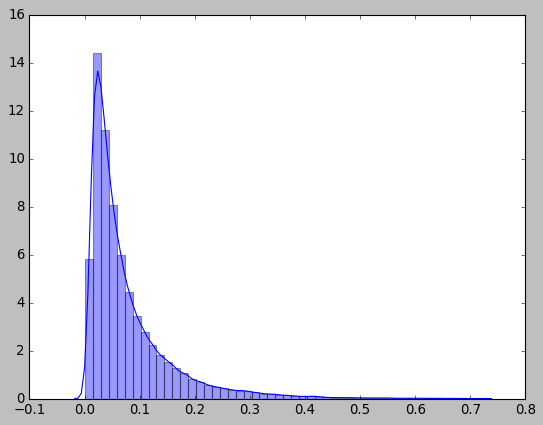

In [92]:
# define a function to predict and output prediction
def test_output(file_name,data=test_data, data_id=test_id):
    preds = est.predict(data)
    file = pd.DataFrame()
    file['SK_ID_CURR'] = data_id
    file['TARGET'] = preds
    file.to_csv(file_name, index=False)
    sns.distplot(preds)

test_output("est_lgb.csv")
# improved to 0.760

In [93]:
from lightgbm import plot_importance
# from lightgbm import LGBMModel

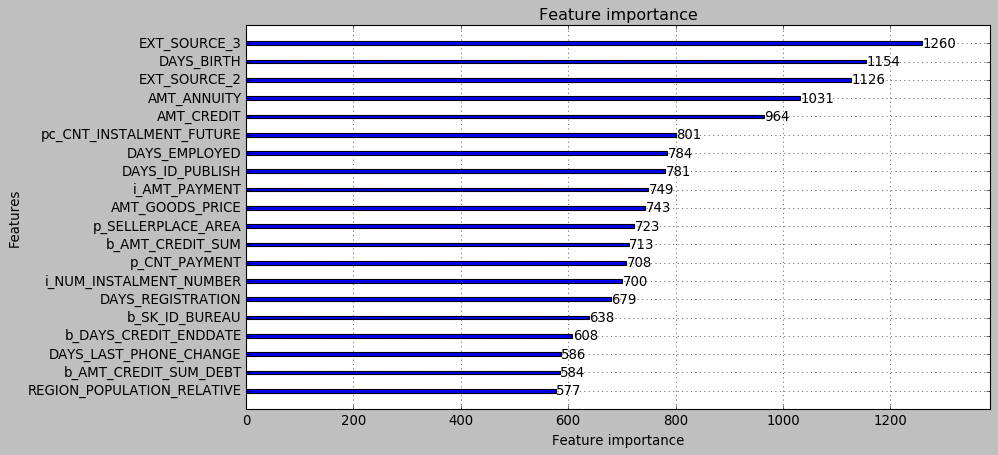

In [73]:
lgb.plot_importance(est,figsize=(12, 6), max_num_features=20)

## How to predict the default probability with knowing the only top 10 features?

In [74]:
top10 = ['EXT_SOURCE_3','DAYS_BIRTH','EXT_SOURCE_2','AMT_ANNUITY','AMT_CREDIT',
         'pc_CNT_INSTALMENT_FUTURE','DAYS_EMPLOYED',
         'DAYS_ID_PUBLISH','i_AMT_PAYMENT','AMT_GOODS_PRICE']

In [75]:
train,validation = train_test_split(train_data,test_size=0.2,random_state=0)

In [76]:
train_X_reduced = train_X[top10]

In [77]:
train_X_reduced.shape

(246008, 10)

In [78]:
train_Y.shape

(246008, 1)

In [79]:
valid_X_reduced = validation_X[top10]
valid_X_reduced.shape

(61503, 10)

In [80]:
validation_Y.shape

(61503, 1)

In [106]:
lgb_train_reduced = lgb.Dataset(train_X_reduced, label=np.concatenate(train_Y.values).ravel())
lgb_eval_reduced = lgb.Dataset(valid_X_reduced, label=np.concatenate(validation_Y.values).ravel(),reference=lgb_train)

In [113]:
params_reduced = {}
params_reduced['boosting_type'] = 'gbdt' # default
# others:
# ‘dart’, Dropouts meet Multiple Additive Regression Trees. 
# ‘goss’, Gradient-based One-Side Sampling. 
# ‘rf’, Random Forest.
params_reduced['metric'] = 'auc'
# params['sub_feature'] = 0.5
# params['sub_feature'] = 0.5 ? What is this
params_reduced['num_leaves'] = 32
params_reduced['max_depth'] = 9
params_reduced['learning_rate'] = 0.01
params_reduced['n_estimators'] = 50000 # default is 100, number of boosted trees to fit
params_reduced['objective'] = 'binary'
params_reduced['class_weight'] = 'is_unbalance'
params_reduced['min_split_gain']=0 # default is 0
params_reduced['min_child_weight'] = 1 # default 1
params_reduced['min_child_samples'] = 20 # default is 20

In [114]:
est2 = lgb.train(params_reduced,lgb_train_reduced, valid_sets=lgb_eval_reduced,early_stopping_rounds=150,verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.732679
[400]	valid_0's auc: 0.741686
[600]	valid_0's auc: 0.744446
[800]	valid_0's auc: 0.745279
[1000]	valid_0's auc: 0.745986
[1200]	valid_0's auc: 0.746436
[1400]	valid_0's auc: 0.746593
[1600]	valid_0's auc: 0.746733
Early stopping, best iteration is:
[1560]	valid_0's auc: 0.746752


In [115]:
test_data[:10][top10]

,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_2,AMT_ANNUITY,AMT_CREDIT,pc_CNT_INSTALMENT_FUTURE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,i_AMT_PAYMENT,AMT_GOODS_PRICE
307511,0.177549,0.334693,0.923573,0.073886,0.130787,0.024074,0.040670,0.887175,0.002350,0.102132
307512,0.482907,0.400481,0.341118,0.061443,0.044387,0.120000,0.035085,0.774489,0.002491,0.034792
307513,0.681715,0.290146,0.818464,0.265830,0.154373,0.255093,0.035114,0.513269,0.003889,0.147026
307514,0.683628,0.628975,0.596114,0.184872,0.382022,0.168817,0.041879,0.415312,0.001739,0.382716
307515,0.568211,0.681292,0.497880,0.118761,0.144944,0.097436,0.041030,0.407809,0.004432,0.145903
307516,0.438028,0.370298,0.735561,0.128642,0.228387,0.224872,0.015406,0.718355,0.008727,0.191919
307517,0.726684,0.477559,0.667935,0.079958,0.113413,0.095833,0.040015,0.966514,0.003931,0.083053
307518,0.348235,0.878263,0.716998,0.049158,0.033708,0.041667,0.043129,0.714464,0.007245,0.034792
307519,0.583116,0.697837,0.945951,0.106634,0.079874,0.215646,0.044105,0.559400,0.004100,0.068462
307520,0.216130,0.829132,0.520290,0.014514,0.000000,0.104082,0.039898,0.577463,0.001623,0.001122


In [116]:
import pickle

In [117]:
# save the model to disk
filename = 'finalized_model_est2_update.sav'
model = est2
pickle.dump(model, open(filename, 'wb'))

### Predict default risk with given features
Some time later, the staff at Home Credit Group can use this model to predict default risk. 
The app website is http://home-credit-215621.appspot.com/index

In [118]:
# use this code to predict with given features
import pandas as pd
import pickle
# load the model from disk
# filename = 'finalized_est_top.sav'
filename = 'finalized_model_est2_update.sav'

new_df = pd.read_csv('new_df.csv')
new_df.set_index('Unnamed: 0',inplace=True)
# defined a function to convert all user input to 0-1 for model training 
def convert_input(dict,new_df):
    out_dict = {}
    for k,v in dict.items():
        X_min = new_df.at[k,'min']
        X_max = new_df.at[k,'max']
        X_std = (v - X_min) / (X_max-X_min)
        out_dict[k]=X_std
#         print(k)
    return out_dict
test_dict={'AMT_ANNUITY': 2000000,
 'AMT_CREDIT': 500000,
 'AMT_GOODS_PRICE': 80000,
 'DAYS_BIRTH': -15000,
 'DAYS_EMPLOYED': 20000,
 'DAYS_ID_PUBLISH': -3000,
 'EXT_SOURCE_2': 1.5,
 'EXT_SOURCE_3': 0.3,
 'i_AMT_PAYMENT': 800000,
 'pc_CNT_INSTALMENT_FUTURE': 30}
# predict
user_input = convert_input(test_dict,new_df)

loaded_model = pickle.load(open(filename, 'rb'))
onerow = pd.DataFrame(data=user_input,index=[0])
loaded_model.predict(onerow)